In [3]:
#supress warning 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#change the default number of rows to be displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_info_columns', 1000)

In [5]:
#In Brazil, people use "." to represent thousand seperator.
#header=0 replace existing names
df = pd.read_csv('fire2.csv', encoding='latin1',sep='\\t', names=['Year','State','Month','Number','Date'],header=0,
                thousands='.')

There is no missing value. hooray!!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
Year      6454 non-null object
State     6454 non-null object
Month     6454 non-null object
Number    6454 non-null int64
Date      6454 non-null object
dtypes: int64(1), object(4)
memory usage: 252.2+ KB


In [262]:
df.head()

,Year,State,Month,Number,Date
0,"""1998",Acre,Janeiro,0,"01/01/1998"""
1,"""1999",Acre,Janeiro,0,"01/01/1999"""
2,"""2000",Acre,Janeiro,0,"01/01/2000"""
3,"""2001",Acre,Janeiro,0,"01/01/2001"""
4,"""2002",Acre,Janeiro,0,"01/01/2002"""


Remove the annoying " in Year and Date columns.

In [9]:
df['Year'] = df['Year'].str.strip('"')
df['Date'] = df['Date'].str.strip('"')
df['Year'] = df['Year'].astype('int')

What is the time scale?

In [10]:
#from 1998 - 2017, how about month?
df['Year'].describe()

count    6454.000000
mean     2007.461729
std         5.746654
min      1998.000000
25%      2002.000000
50%      2007.000000
75%      2012.000000
max      2017.000000
Name: Year, dtype: float64

In [11]:
#2017 only have 11 month data
df.groupby('Year')['Month'].nunique()

Year
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    11
Name: Month, dtype: int64

In [12]:
df.loc[df['Year']==2017,'Month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro'], dtype=object)

The time range is from 1998 Jan to 2017 Nov.

According to the geographic knowledge, Brazil has 26 states and 1 federal district (distrito federal). Let's check our data!

In [13]:
#How many states?
df['State'].nunique()

27

In [14]:
df['State'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [15]:
#Do we have complete data in each state? 12(month)*20(year)-1(2017 Dec)=239. Each state should contains 239 data 
df.groupby('State').count()


,Year,Month,Number,Date
State,,,,
Acre,239,239,239,239
Alagoas,240,240,240,240
Amapá,239,239,239,239
Amazonas,239,239,239,239
Bahia,239,239,239,239
Ceará,239,239,239,239
Distrito Federal,239,239,239,239
Espírito Santo,239,239,239,239
Goiás,239,239,239,239


Alagoas has 240 data. Is that duplicated data?

In [16]:
Alagoas = df[df['State']=='Alagoas']

In [17]:
#extra data in 2017.
Alagoas.groupby('Year').count()

,State,Month,Number,Date
Year,,,,
1998,12,12,12,12
1999,12,12,12,12
2000,12,12,12,12
2001,12,12,12,12
2002,12,12,12,12
2003,12,12,12,12
2004,12,12,12,12
2005,12,12,12,12
2006,12,12,12,12


In [18]:
Alagoas[Alagoas['Year']==2017]

,Year,State,Month,Number,Date
258,2017,Alagoas,Janeiro,38,01/01/2017
259,2017,Alagoas,Janeiro,38,01/01/2017
279,2017,Alagoas,Fevereiro,21,01/01/2017
299,2017,Alagoas,Março,23,01/01/2017
319,2017,Alagoas,Abril,7,01/01/2017
339,2017,Alagoas,Maio,1,01/01/2017
359,2017,Alagoas,Junho,2,01/01/2017
379,2017,Alagoas,Julho,0,01/01/2017
399,2017,Alagoas,Agosto,1,01/01/2017
419,2017,Alagoas,Setembro,4,01/01/2017


We found Jan(Janeiro) has duplicated data. Let's remove it!

In [19]:
df.drop_duplicates(keep='first', inplace=True)

In [20]:
#check again
df.groupby('State').count()

,Year,Month,Number,Date
State,,,,
Acre,239,239,239,239
Alagoas,239,239,239,239
Amapá,239,239,239,239
Amazonas,239,239,239,239
Bahia,239,239,239,239
Ceará,239,239,239,239
Distrito Federal,239,239,239,239
Espírito Santo,239,239,239,239
Goiás,239,239,239,239


In [21]:
#we should total have 27*(12*20-1) = 6453 data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6453 entries, 0 to 6453
Data columns (total 5 columns):
Year      6453 non-null int64
State     6453 non-null object
Month     6453 non-null object
Number    6453 non-null int64
Date      6453 non-null object
dtypes: int64(2), object(3)
memory usage: 302.5+ KB


Now, we have the complete data! Let's do some EDA to explore the data.

In [22]:
p1=df.groupby('Year')['Number'].sum()

In [23]:
p1

Year
1998    123881
1999    134596
2000    101528
2001    145567
2002    235792
2003    235242
2004    270384
2005    240764
2006    136890
2007    231252
2008    123249
2009    123211
2010    249274
2011    133080
2012    193791
2013    115184
2014    183660
2015    236305
2016    188295
2017    261047
Name: Number, dtype: int64

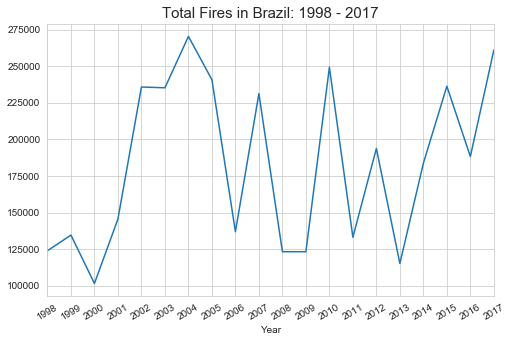

In [183]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
p1.plot(x='year',y='number',kind='line')
plt.xticks(np.arange(1998,2018),rotation=30)
plt.title('Total Fires in Brazil: 1998 - 2017', fontsize = 15)
plt.show()

The total fire count in Brazil is quite flexable in different years. 2004 reachs the highest number of fire which is up to 270000. 2017 might be the second one but remember 2017's record doesn't have December data. 

Next, let's try to define the fire season.

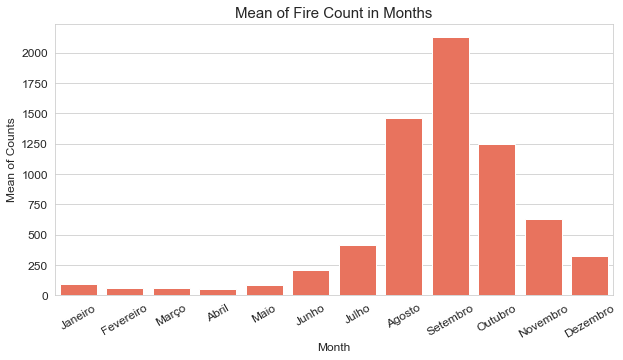

In [184]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Number', data=df,ci=None, color='tomato')
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Mean of Counts',fontsize=12)
plt.title('Mean of Fire Count in Months', fontsize=15)
plt.show()

The fire season seems like during June to November! 

After digging into time, now let's focus on the location data. Which state or area has most frequent fire?


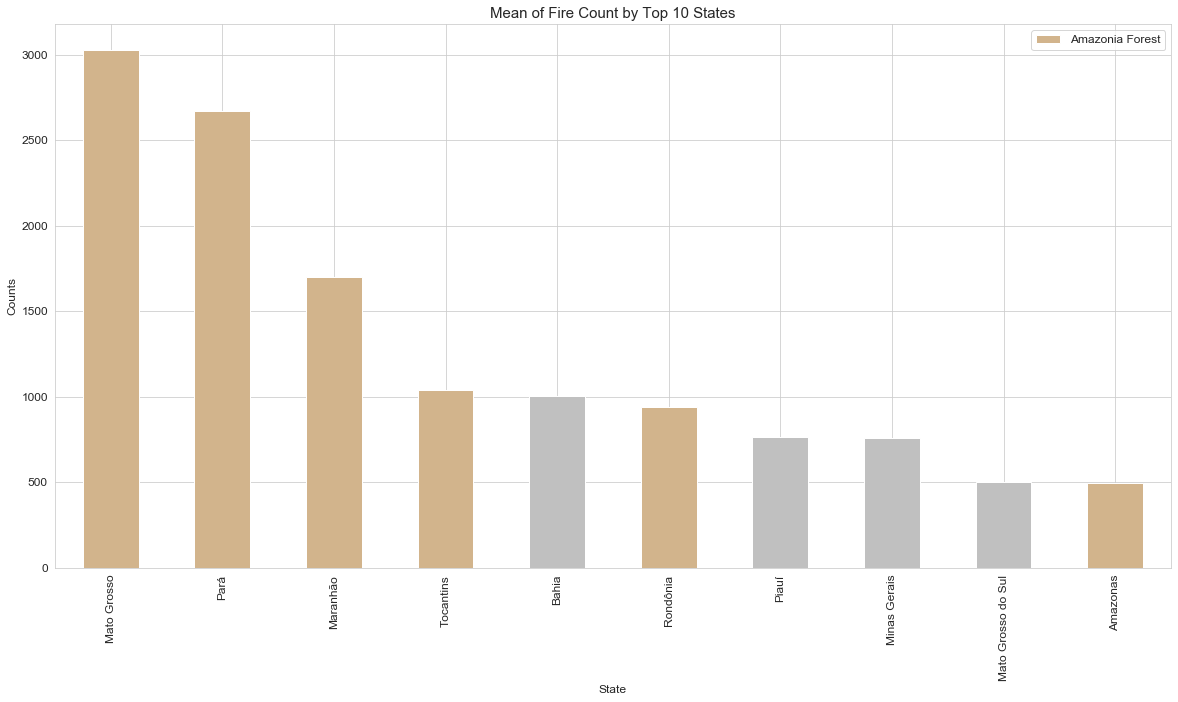

In [185]:
p2 = df.groupby('State')['Number'].mean().sort_values(ascending=False)[0:10]
forest=['Amazonas', 'Pará', 'Roraima', 'Amapá', 'Rondônia', 'Acre', 'Tocantins', 'Mato Grosso', 'Maranhão']

colors = ['tan' if i in forest else 'silver' for i in p2.index]

plt.figure(figsize=(20,10))
p2.plot(x='State',y='Number', kind='bar', color=colors)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Mean of Fire Count by Top 10 States', fontsize=15)
plt.legend(['Amazonia Forest'],fontsize=12)

plt.show()

The top three states are: Mato Grosso, Para, and Maranhao. Also, we would like to know the fire counts in Amazon forest. Below are the maps. 
The legal Amazon comprises the states of Acre, Amapá, Pará, Amazonas, Rondonia, Roraima, and part of Mato Grosso, Tocantins, and Maranhão.
We observed that the top 3 state belongs in amazon forest area. 


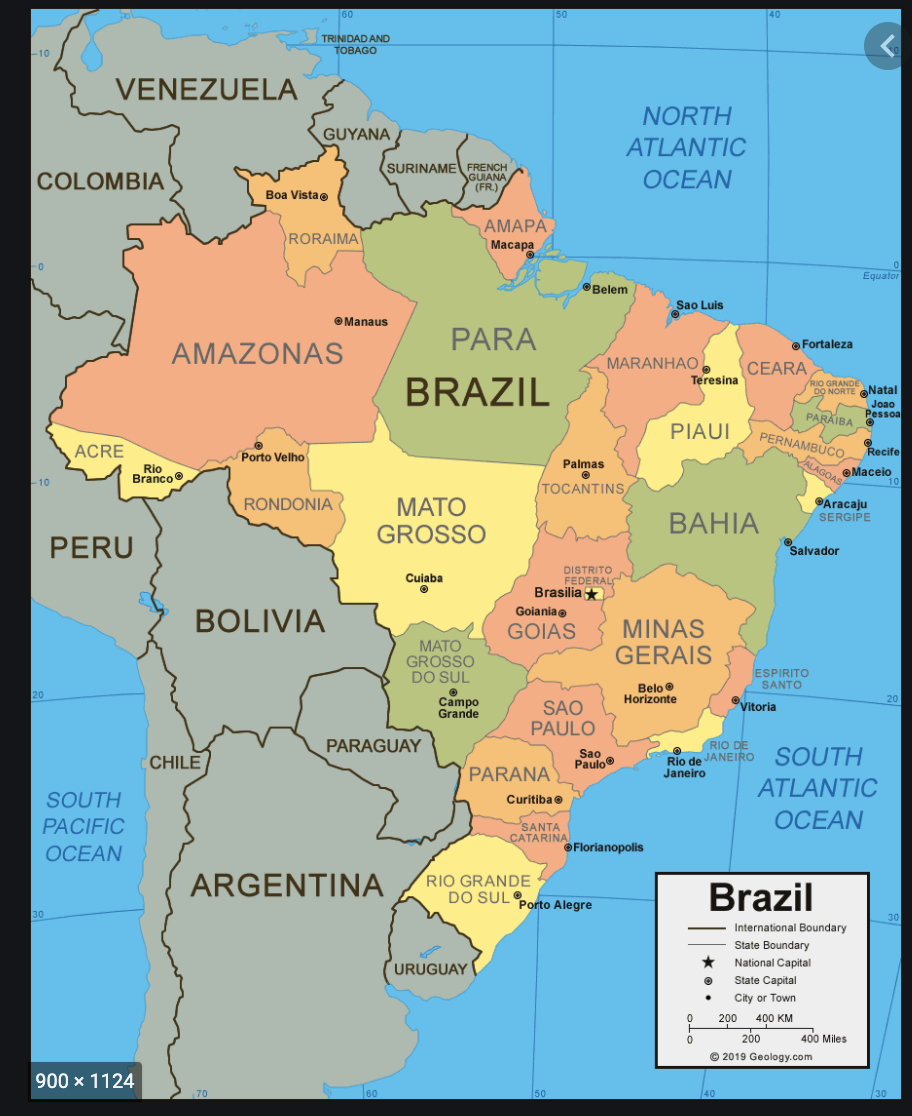
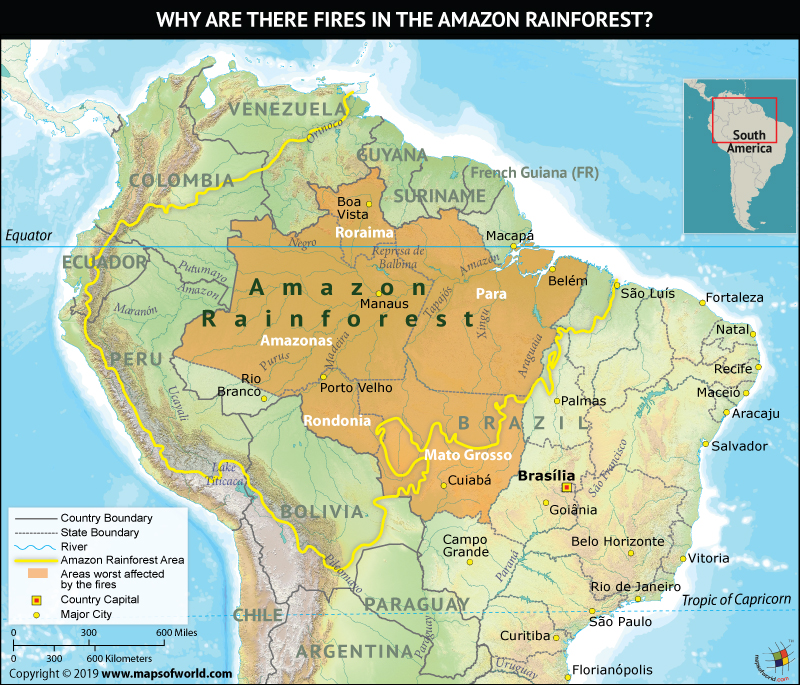

Next, we focus on the top 3 states.

In [110]:
#Mato Grosso
d1 = df[df['State'] == 'Mato Grosso']
#Pará
d2 = df[df['State'] == 'Pará']
#Maranhão
d3 = df[df['State'] == 'Maranhão']

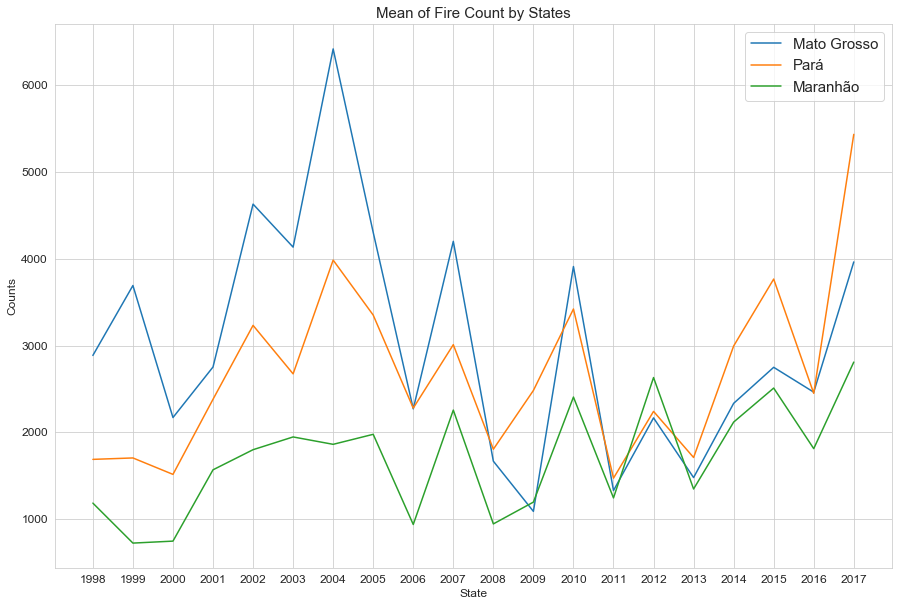

In [187]:

plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Number',data=d1, ci=None, label='Mato Grosso')
sns.lineplot(x='Year', y='Number',data=d2, ci=None, label='Pará')
sns.lineplot(x='Year', y='Number',data=d3, ci=None, label='Maranhão')
plt.xticks(range(1998,2018),fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Mean of Fire Count by States', fontsize=15)
plt.legend(fontsize=15)
plt.show()

After 2011,Para state has more fire than Mato Grosso espically in 2017. Maranhao state has an upward trend.

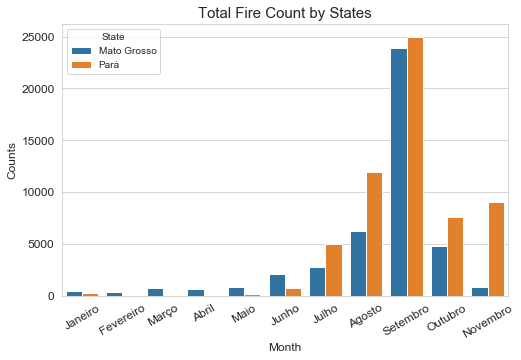

In [214]:
d1_2017 = d1[d1['Year']==2017]
d2_2017 = d2[d2['Year']==2017]

d_2017 = d1_2017.append(d2_2017)

plt.figure(figsize=(8,5))

sns.barplot(x='Month', y='Number', data=d_2017, hue='State',ci=None)

plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Total Fire Count by States', fontsize=15)


plt.show()

The difference is caused by the extremely high fire number in Para in November. This may due to human deforestation and the drier climate.
reference:https://news.mongabay.com/2017/10/record-amazon-fires-stun-scientists-sign-of-sick-degraded-forests/